# Problem Statement: Term Deposit Marketing

We are given the data coming from direct marketing efforts of a European banking institution (Client). The client is interested in developing a robust machine learning system that leverages information coming from the call center data. The marketing campaign involves making a phone call to a client's customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

Ultimately, the client is looking for ways to improve the success rate for calls made to customers for any product that their clients offer. Towards this goal, the client is working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for their customers to make informed decisions.

## Data Description
The data is provided by the client and is a mix of categorical and numeric variables.

### Predictor Variables
1. age : age of customer (numeric)
2. job : type of job (categorical)
3. marital : marital status (categorical)
4. education (categorical)
5. default: has credit in default? (binary)
6. balance: average yearly balance, in euros (numeric)
7. housing: has a housing loan? (binary)
8. loan: has personal loan? (binary)
9. contact: contact communication type (categorical)
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical)
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

### Response variable
- y: indicates whether the client's customer has subscribed to a term deposit (binary)

### Goals:
1. Predict whether the customer will subscribe to a term deposit
    - Success metric: Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.
2. The client is also interested in finding customers who are more likely to buy the investment product.
    - Determine the segment(s) of customers the client should prioritize.
3. What makes the customers buy?
    - Identify the feature(s) that the client should be focusing more on.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

# Visualizaton libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Create the dataframe from the given dataset
dataLocation = "../data/term-deposit-marketing-2020.csv"
df = pd.read_csv(dataLocation)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


# Check for duplication

In [4]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

# Check for missing values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

There are no missing values in the provided dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


# Univariate Data Exploration
## Numerical Independent Variables

In [7]:
numDf = df.select_dtypes(include='number')
numDf.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


C:\Users\Niraj Altekar\AppData\Local\Temp\ipykernel_22760\3862931574.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>, <Axes: >]], dtype=object)

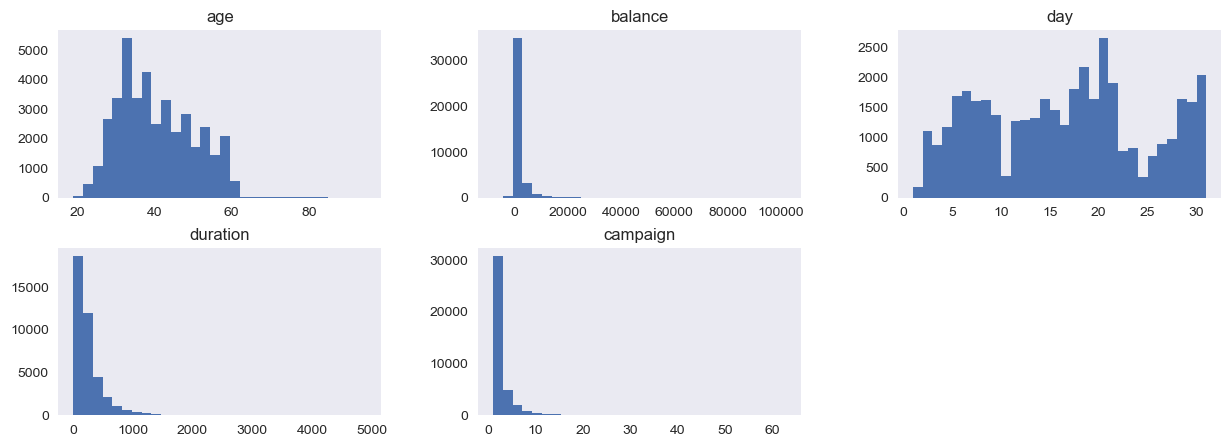

In [8]:
plt.style.use('seaborn')
numDf.hist(layout=(2,3), bins=30, figsize=(15,5), grid=False)

### Age
1. Most of the contacted customers fell within the ages 20 to 60.
2. Out of that age group, over 75% were younger than 48 years old and about half of them were younger than 40 years.

### Balance
1. Majority of the contacted customers had balances lower than 1319. 
2. The proportion of contacted individuals having higher balances was substantially low.

### Day
The days on which customers were contacted were close to uniformly distributed over the month (from day 1 to 31)

### Duration
Most call durations lasted for around 5 minutes (~300 seconds). However, the maximum call duration was 4918 seconds which corresponds to around 80 minutes. For marketing campaigns, such values may be treated as outliers. 

### Campaign
Most customers were contacted less than 10 times with over 75% customer contacted less than 3 times.

## Categorical Independent Variables

In [9]:
catDf = df.select_dtypes(include='object')
catDf.describe()

,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


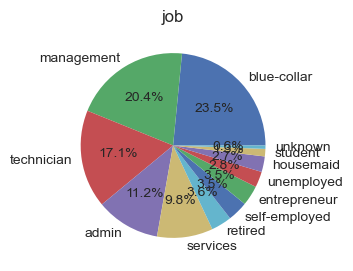

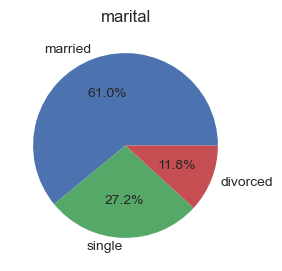

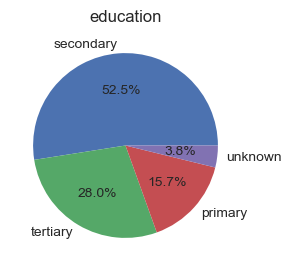

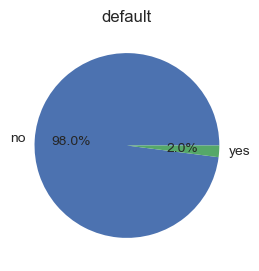

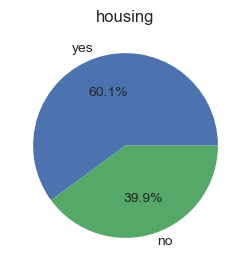

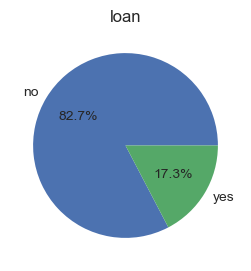

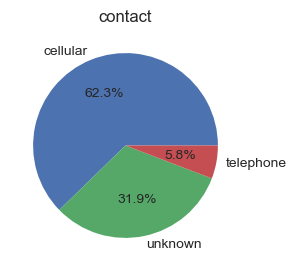

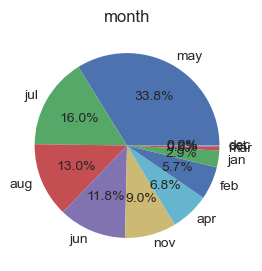

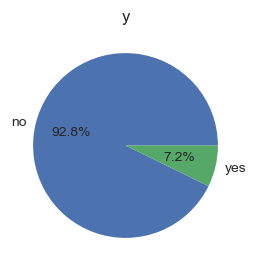

In [10]:
for column in catDf.columns:
    ax=catDf[column].value_counts().plot(kind='pie', figsize=(4,3), grid=False, title=column, autopct='%1.1f%%')
    ax.yaxis.set_visible(False)
    plt.show()

### Job	
Majority of the contacted customers had a in blue-collar, management, technician, admin, and services department.

### Marital Status
Contacted customers that were married were more than double than single customers. The proportion of divorced individuals among the contacted customers was lowest.

### Education	
Most contacted customers had atleast secondary education. There were some customers whose education level was not known from the survey.

### Default	
Very few of the contacted customers had defaulted on loan.

### Housing
Although majority of the contacted customers owned a house, the proportion of contacted customers not having a house was significant too. 

### Loan

### Contact	

### Month
Majority of customers were contacted in the month of *MAY* and very few customers were contacted in the month of *December*. We may want to club months to analyze based on the quarters of the years rather than individual months.

### Response Variable (y)
The responsible variable is highly imbalanced with only 7.2% of contacted customers opting to subscribe to the term deposit. Rest customer did not opt to subscribe.

# Test Train Split

In [11]:
X = df.drop(columns=['y'])
y = df['y']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Preprocessing



## Categorical Variables: Ordinal & Binary Variable Treatment

Ordinal variables: month, education
Binary variables: default, housing, loan

Note: the education column has some rows as unknown. We need to encode this as missing values while ordinal encoding and the deal with missing values separately.

In [12]:
X_train.replace('unknown', np.nan, inplace=True)
X_test.replace('unknown', np.nan, inplace=True)
ordinalEncoder = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],['yes', 'no'],['yes', 'no'],['yes', 'no']], 
                                handle_unknown='use_encoded_value', unknown_value=np.nan)
X_train[['month', 'default', 'housing', 'loan']] = ordinalEncoder.fit_transform(X_train[['month', 'default', 'housing', 'loan']])
X_test[['month', 'default', 'housing', 'loan']] = ordinalEncoder.transform(X_test[['month', 'default', 'housing', 'loan']])



## Categorical Variables: Encoding Non-Binary Nominal Variables




In [13]:
X_train = pd.get_dummies(X_train, columns=['education', 'job', 'marital', 'contact'])
X_test = pd.get_dummies(X_test, columns=['education', 'job', 'marital', 'contact'])

In [14]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

np.bincount(y_train)

array([29680, 29680], dtype=int64)

## Numerical Variables: Outlier Treatment
We will use z-scores for identifying and eliminating outliers for numerical columns

In [15]:
def get_outlier_count(df:pd):
    outliers = []
    z_cut = 3
    mean = np.mean(df)
    sd = np.std(df)
    
    for row in df:
        z = (row - mean)/sd
        if z > z_cut:
            outliers.append(row)
    return outliers

columnNum = ['age','balance','duration','campaign']
for column in columnNum:
    df_ = X_train[column]
    # Detect outliers using Z-score
    outliers = get_outlier_count(df_)
    print(column, len(outliers))

age 373
balance 1103
duration 754
campaign 1093


In [16]:
X_train['balance'].quantile(0.99)

12855.819999999992

# What to do with outliers? We can cap them to 99-percentile - but what to do when a new data point comes in with a potential outlier? I will keep them to continue the workflow but visit it later before submission.

In [17]:
import xgboost as xgb

In [18]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':1000
        }         
           
          
# instantiate the classifier 
xgb_clf = xgb.XGBClassifier(**params)

In [19]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [20]:
y_pred = xgb_clf.predict(X_test)

In [21]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9177


<Axes: >

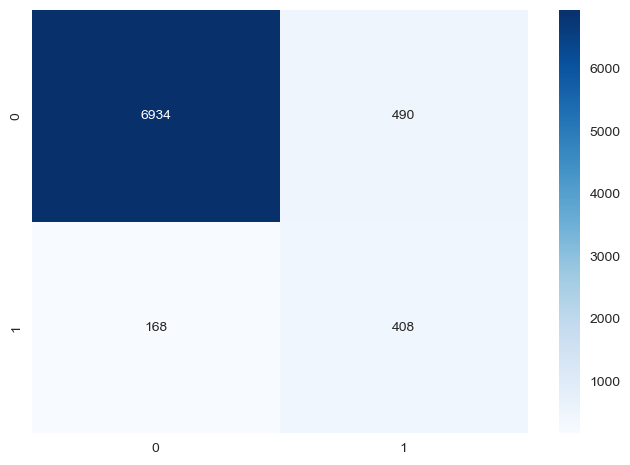

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(5)
# instantiate the classifier 
xgb_clf = xgb.XGBClassifier(**params)

results = cross_val_score(xgb_clf, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.24% (3.41%)
